In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/weather-classification-data/weather_classification_data.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


<Axes: xlabel='Weather Type', ylabel='count'>

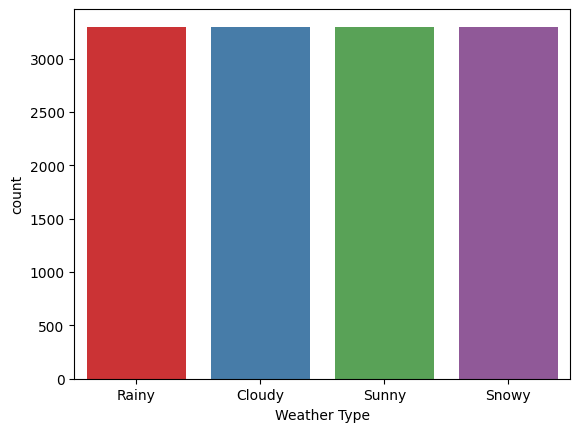

In [4]:
sns.countplot(df,x='Weather Type',palette='Set1')

<Axes: xlabel='Location', ylabel='count'>

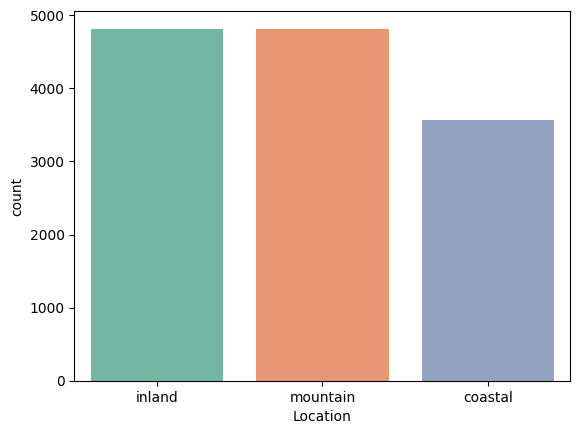

In [5]:
sns.countplot(df,x='Location',palette='Set2')

<Axes: xlabel='Season', ylabel='count'>

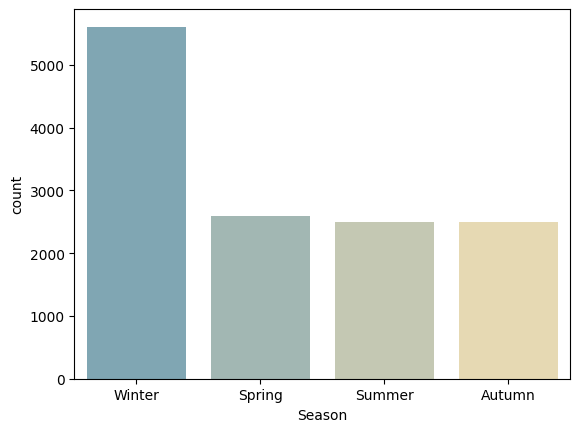

In [6]:
sns.countplot(df,x='Season',palette='blend:#7AB,#EDA')

<Axes: xlabel='Cloud Cover', ylabel='count'>

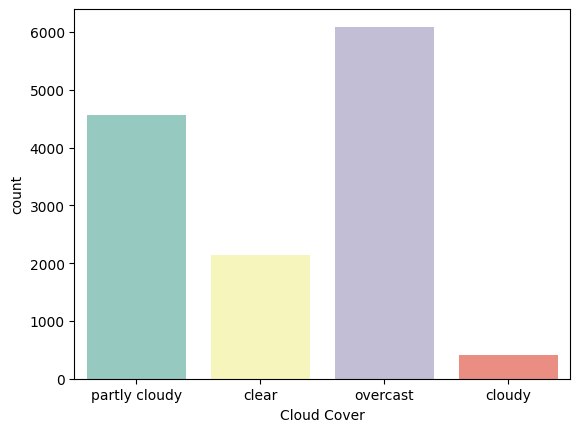

In [7]:
sns.countplot(df,x='Cloud Cover',palette='Set3')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


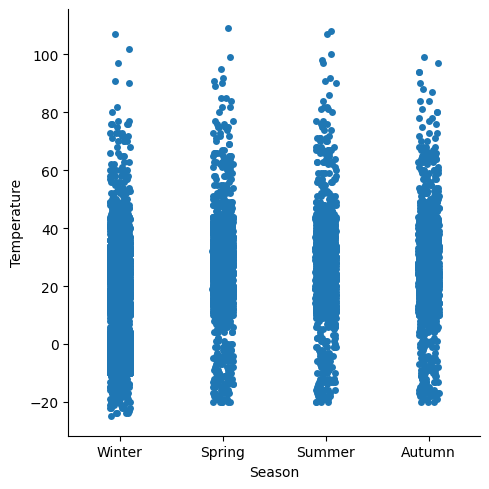

In [8]:
sns.catplot(df,x='Season',y='Temperature')

<Axes: ylabel='Humidity'>

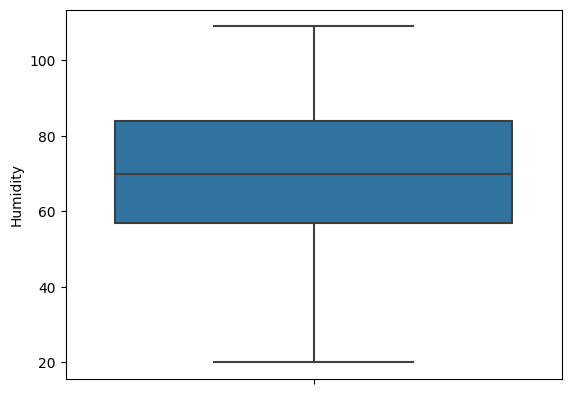

In [9]:
sns.boxplot(df,y='Humidity')

<Axes: ylabel='UV Index'>

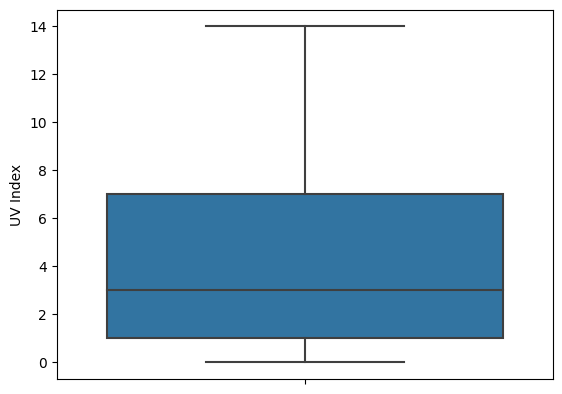

In [10]:
sns.boxplot(df,y='UV Index')


<Axes: ylabel='Visibility (km)'>

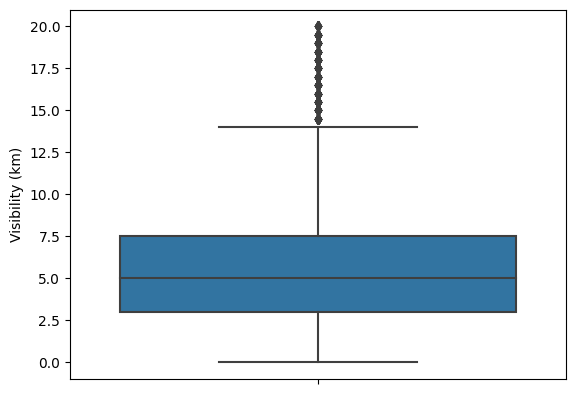

In [11]:
sns.boxplot(df,y='Visibility (km)')


In [12]:
df.drop('Atmospheric Pressure',axis=1,inplace=True)

In [13]:
df.isnull().sum()

Temperature          0
Humidity             0
Wind Speed           0
Precipitation (%)    0
Cloud Cover          0
UV Index             0
Season               0
Visibility (km)      0
Location             0
Weather Type         0
dtype: int64

In [14]:
numeric=['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'UV Index',
 'Visibility (km)']

In [15]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()
for col in numeric:
    df[col]=imputer.fit_transform(df[[col]])

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [17]:
df['Cloud Cover']=label_encoder.fit_transform(df['Cloud Cover'])
df['Season']=label_encoder.fit_transform(df['Season'])
df['Location']=label_encoder.fit_transform(df['Location'])
df['Weather Type']=label_encoder.fit_transform(df['Weather Type'])

In [18]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,3,2.0,3,3.5,1,1
1,39.0,96.0,8.5,71.0,3,7.0,1,10.0,1,0
2,30.0,64.0,7.0,16.0,0,5.0,1,5.5,2,3
3,38.0,83.0,1.5,82.0,0,7.0,1,1.0,0,3
4,27.0,74.0,17.0,66.0,2,1.0,3,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,2,1.0,2,1.0,2,1
13196,-1.0,76.0,3.5,23.0,1,1.0,3,6.0,0,2
13197,30.0,77.0,5.5,28.0,2,3.0,0,9.0,0,0
13198,3.0,76.0,10.0,94.0,2,0.0,3,2.0,1,2


In [19]:
x=df.drop('Weather Type',axis=1)
x

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Visibility (km),Location
0,14.0,73.0,9.5,82.0,3,2.0,3,3.5,1
1,39.0,96.0,8.5,71.0,3,7.0,1,10.0,1
2,30.0,64.0,7.0,16.0,0,5.0,1,5.5,2
3,38.0,83.0,1.5,82.0,0,7.0,1,1.0,0
4,27.0,74.0,17.0,66.0,2,1.0,3,2.5,2
...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,2,1.0,2,1.0,2
13196,-1.0,76.0,3.5,23.0,1,1.0,3,6.0,0
13197,30.0,77.0,5.5,28.0,2,3.0,0,9.0,0
13198,3.0,76.0,10.0,94.0,2,0.0,3,2.0,1


In [20]:
y=df['Weather Type']
y

0        1
1        0
2        3
3        3
4        1
        ..
13195    1
13196    2
13197    0
13198    2
13199    1
Name: Weather Type, Length: 13200, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [22]:
df['Weather Type'].value_counts()

Weather Type
1    3300
0    3300
3    3300
2    3300
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [25]:
models={'KNeighborsClassifier':KNeighborsClassifier(),
      'SVC':SVC(),
      'DecisionTreeClassifierr':DecisionTreeClassifier(), 
      'RandomForestClassifier':RandomForestClassifier(),
        'XGBClassifier':XGBClassifier()
       }

In [26]:
for name,model in models.items():
    print(f'Using model {name} :')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Traning Accuracy : {accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy : {accuracy_score(y_test,y_pred)}')
    print('-----------------------------------\n')

Using model KNeighborsClassifier :
Traning Accuracy : 0.9271780303030303
Testing Accuracy : 0.8928030303030303
-----------------------------------

Using model SVC :
Traning Accuracy : 0.9299242424242424
Testing Accuracy : 0.906439393939394
-----------------------------------

Using model DecisionTreeClassifierr :
Traning Accuracy : 1.0
Testing Accuracy : 0.8965909090909091
-----------------------------------

Using model RandomForestClassifier :
Traning Accuracy : 1.0
Testing Accuracy : 0.9087121212121212
-----------------------------------

Using model XGBClassifier :
Traning Accuracy : 0.999905303030303
Testing Accuracy : 0.9094696969696969
-----------------------------------

